<h1><b>GENERATOR FOR BALANCED PAIRS<b><h1>

<h4>This notebook depicts subsampling the images, splitting them into training, validation and test, and mainly generating balanced pairs of images<h4>

Importing relevant libraries

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.set_option('display.max_columns', 50)

Importing a costume created module by Petr Nguyen

In [2]:
import src_PN.PN_functions as PN

Creating paths for saving generated data frames

In [3]:
if not os.path.exists('./csv/'):
    os.makedirs('./csv/')

Parameters' initialization

In [4]:
random_seed = 1234
total_num_pairs = 10000
test_num_pairs = 1000
train_num_pairs = int((total_num_pairs - test_num_pairs)*0.7)
valid_num_pairs = int((total_num_pairs - test_num_pairs)*0.3)

In [5]:
print(f'total number of pairs: {total_num_pairs}')
print(f'total number of pairs in training set: {train_num_pairs}')
print(f'total number of pairs in validation set: {valid_num_pairs}')
print(f'total number of pairs in test set: {test_num_pairs}')

total number of pairs: 10000
total number of pairs in training set: 6300
total number of pairs in validation set: 2700
total number of pairs in test set: 1000


Reading and subsampling the images

In [6]:
identity_filtered, atts = PN.images_subsampling()

Original number of images: 202599
Number of images after the 1st exclusion: 193118
Number of images after the 2nd exclusion: 42985
Number of images after the 3rd exclusion: 41510
Number of images after the 4th exclusion: 40826
Final number of images after all the exclusions: 28656


In [7]:
identity_filtered

,image,image_id
9,000010.jpg,612
25,000026.jpg,10046
33,000034.jpg,1603
34,000035.jpg,5512
39,000040.jpg,2088
...,...,...
202514,202515.jpg,7988
202524,202525.jpg,6810
202530,202531.jpg,9768
202571,202572.jpg,5260


In [8]:
atts

,image,w5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
9,000010.jpg,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
25,000026.jpg,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
33,000034.jpg,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
34,000035.jpg,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
39,000040.jpg,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202514,202515.jpg,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
202524,202525.jpg,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
202530,202531.jpg,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
202571,202572.jpg,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,1,0,1


Generating balanced pairs for training, validation and test sets

In [9]:
exclude_imgs_list = []

In [10]:
def extend_list(df_pair):
    global exclude_imgs_list
    
    _ = list(set(list(df_pair['img_1']) + list(df_pair['img_2'])))

    exclude_imgs_list.extend(_)

In [11]:
train_pairs = PN.pairs_generator(identity_filtered, atts, random_seed, train_num_pairs, exclude_imgs_list, 'train')

6300 unique balanced pairs generated                                                             

Total Run Time: 18.00 minutes 



In [12]:
extend_list(train_pairs)

In [13]:
valid_pairs = PN.pairs_generator(identity_filtered, atts, random_seed, valid_num_pairs, exclude_imgs_list, 'valid')

2700 unique balanced pairs generated                                                             

Total Run Time: 6.07 minutes 



In [14]:
extend_list(valid_pairs)

In [15]:
test_pairs = PN.pairs_generator(identity_filtered, atts, random_seed, test_num_pairs, exclude_imgs_list, 'test')

1000 unique balanced pairs generated                                                             

Total Run Time: 1.88 minutes 



In [16]:
extend_list(test_pairs)

In [17]:
len(exclude_imgs_list)

12745

In [18]:
len(list(set(train_pairs['img_1'].tolist() + train_pairs['img_2'].tolist() +\
             valid_pairs['img_1'].tolist() + valid_pairs['img_2'].tolist() +\
             test_pairs['img_1'].tolist() + test_pairs['img_2'].tolist())))

12745

Checking the generated pairs

In [19]:
PN.pairs_check(train_pairs, atts)

Label distribution ... Negative: 3150 (50%) | Positive: 3150 (50%)
Number of unique pairs ... 6300
Number of pairs containing the same image ... 0
Number of images ... 7807
Gender distribution ... Male: 3150 (50%) | Female: 3150 (50%)


In [20]:
PN.pairs_check(valid_pairs, atts)

Label distribution ... Negative: 1350 (50%) | Positive: 1350 (50%)
Number of unique pairs ... 2700
Number of pairs containing the same image ... 0
Number of images ... 3559
Gender distribution ... Male: 1350 (50%) | Female: 1350 (50%)


In [21]:
PN.pairs_check(test_pairs, atts)

Label distribution ... Positive: 500 (50%) | Negative: 500 (50%)
Number of unique pairs ... 1000
Number of pairs containing the same image ... 0
Number of images ... 1379
Gender distribution ... Male: 500 (50%) | Female: 500 (50%)


Plotting the pairs

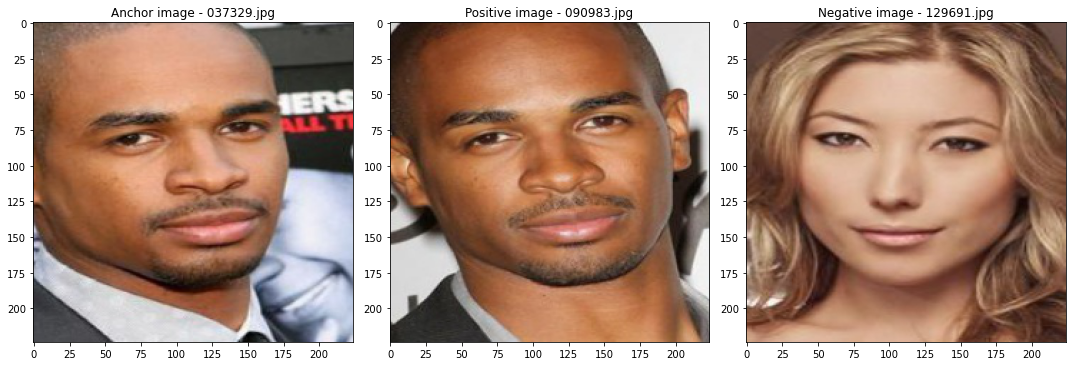

In [22]:
PN.plot_pairs(train_pairs, resize = True)

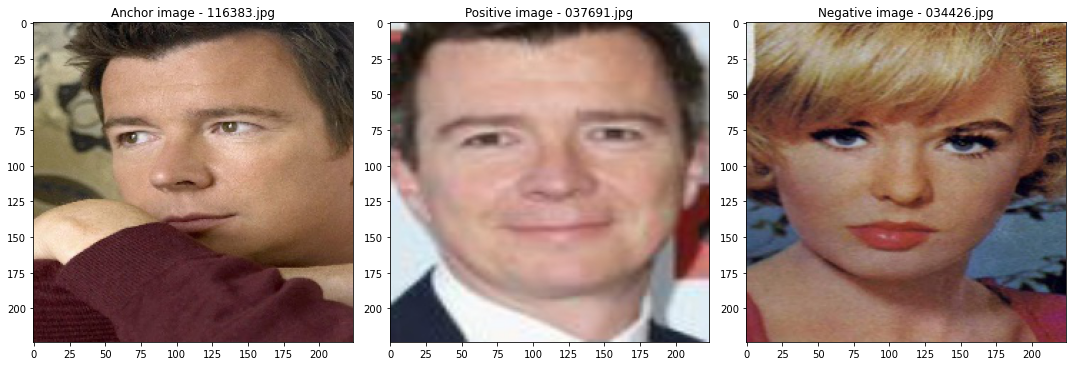

In [23]:
PN.plot_pairs(train_pairs, resize = True)

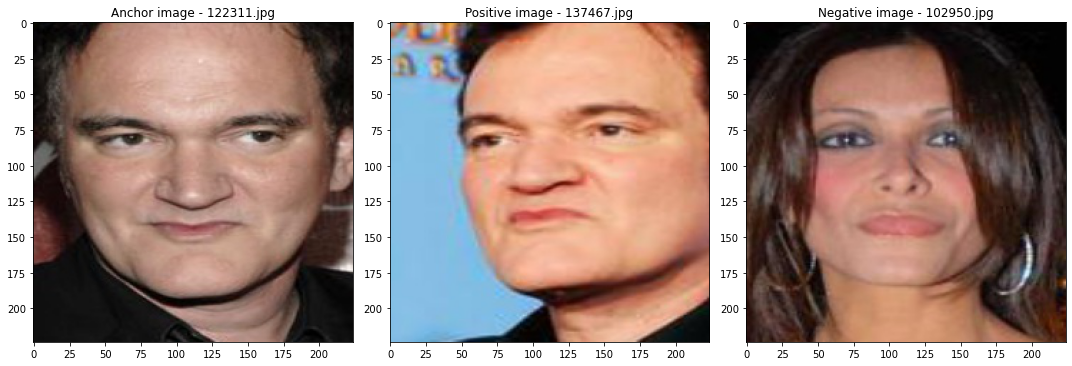

In [24]:
PN.plot_pairs(train_pairs, resize = True)

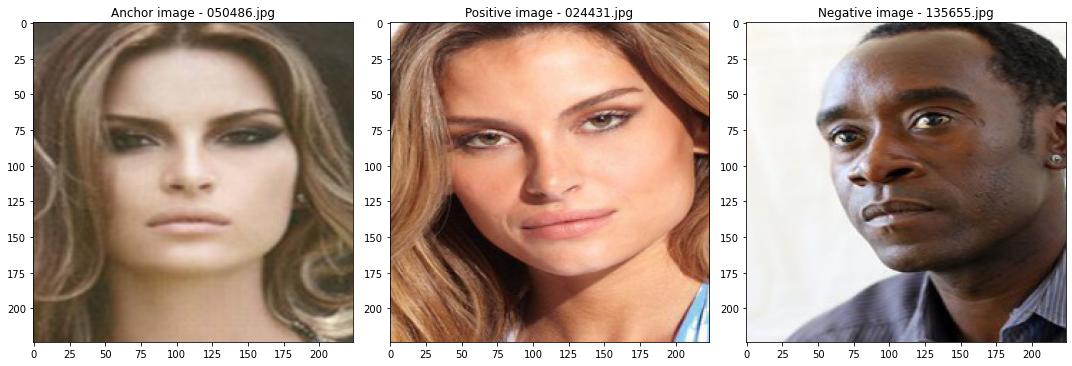

In [25]:
PN.plot_pairs(train_pairs, resize = True)

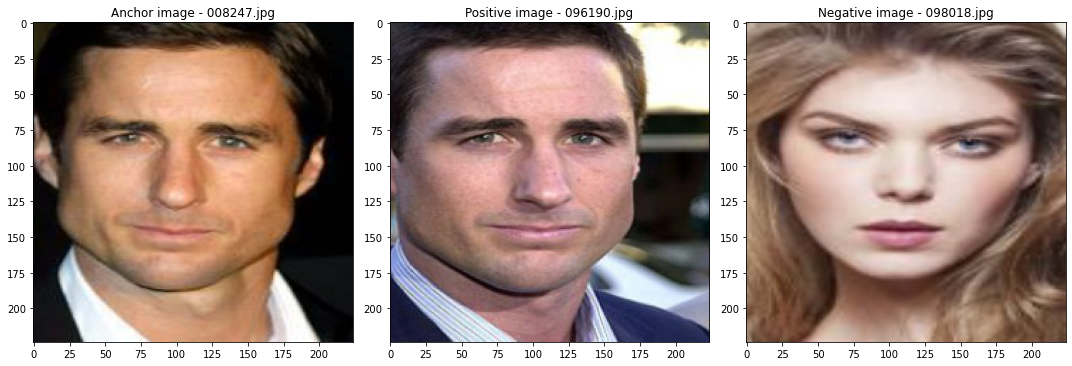

In [26]:
PN.plot_pairs(train_pairs, resize = True)

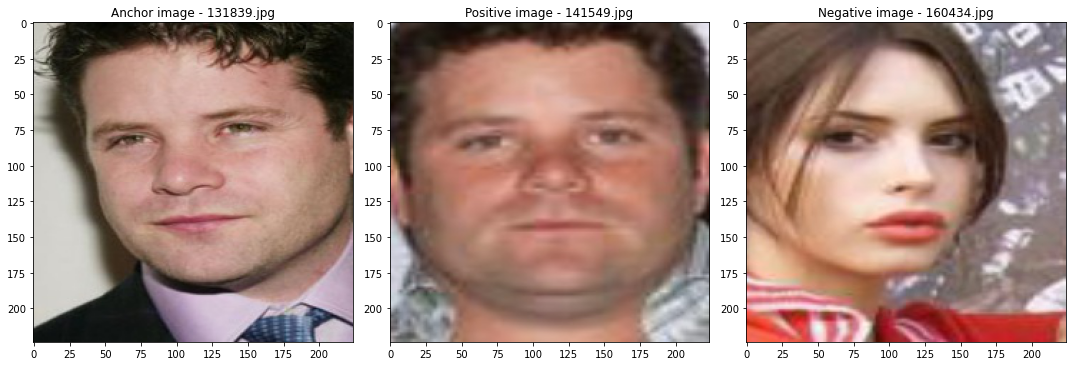

In [27]:
PN.plot_pairs(train_pairs, resize = True)